In [63]:
import openml
from gplearn.genetic import SymbolicTransformer, SymbolicClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [64]:
dataset = openml.datasets.get_dataset(886)

X, y, _, _ = dataset.get_data(dataset_format="dataframe", target=dataset.default_target_attribute)

In [65]:
le = LabelEncoder()
y = le.fit_transform(y)
y = pd.Series(y)

In [66]:
X.head()

,no2_concentration,cars_per_hour,temperature_at_2m,wind_speed,temperature_diff_2m_25m,wind_direction,hour_of_day
0,3.71844,7.69120,9.2,4.8,-0.1,74.4,20
1,3.10009,7.69894,6.4,3.5,-0.3,56.0,14
2,3.31419,4.81218,-3.7,0.9,-0.1,281.3,4
3,4.38826,6.95177,-7.2,1.7,1.2,74.0,23
4,4.34640,7.51806,-1.3,2.6,-0.1,65.0,11


In [67]:
y.head()

0    0
1    1
2    0
3    1
4    1
dtype: int32

In [68]:
function_set = ['add', 'sub', 'mul', 'div',
                'sqrt', 'log', 'abs', 'neg', 'inv',
                'max', 'min']
transformer = SymbolicTransformer(generations=20,
                                  population_size=5000,
                                  hall_of_fame=100,
                                  n_components=10,
                                  function_set=function_set,
                                  parsimony_coefficient=0.0001,
                                  max_samples=0.9,
                                  verbose=1,
                                  random_state=42,
                                  n_jobs=-1)

transformer.fit(X, y)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    12.48        0.0586047       16         0.250899          0.29529     15.71s
   1    11.21         0.111995        9         0.329249         0.149167      1.25m
   2    11.52         0.132941        9         0.342837        0.0444366      1.43m
   3    14.23         0.162586       24         0.341075         0.032167      1.94m
   4    15.01         0.205826        8         0.357414         0.179829      1.41m
   5    14.21          0.23033       13         0.363422         0.083039      1.31m
   6    15.86         0.242902       11         0.376454        0.0546561      1.25m
   7    20.33         0.257863       48         0.381247        0.0170271      1.21m
   8    29.00         0.274382       40          0.40369       0.00751707  

SymbolicTransformer(function_set=['add', 'sub', 'mul', 'div', 'sqrt', 'log',
                                  'abs', 'neg', 'inv', 'max', 'min'],
                    max_samples=0.9, n_jobs=-1, parsimony_coefficient=0.0001,
                    population_size=5000, random_state=42, verbose=1)

In [69]:
X_transformed = transformer.transform(X)
X = np.hstack((X, X_transformed))
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,3.71844,7.69120,9.2,4.8,-0.1,74.4,20.0,1.576829,1.440599,1.440599,1.652364,2.128692,1.300923,1.452848,1.518270,1.574963,1.671316
1,3.10009,7.69894,6.4,3.5,-0.3,56.0,14.0,1.146372,1.053755,1.053755,1.168419,1.799841,1.305415,0.746240,1.609165,1.137884,1.302607
2,3.31419,4.81218,-3.7,0.9,-0.1,281.3,4.0,2.167948,1.393909,1.393909,2.167948,2.172515,1.469033,2.009611,0.707419,1.903039,2.167948
3,4.38826,6.95177,-7.2,1.7,1.2,74.0,23.0,1.252667,0.238150,0.843448,0.826571,0.955793,0.081550,0.715988,0.323627,1.317087,0.714770
4,4.34640,7.51806,-1.3,2.6,-0.1,65.0,11.0,2.000000,1.230046,1.230046,2.000000,2.011699,1.090918,2.000000,0.196733,2.000000,2.000000


In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [71]:
clf = SymbolicClassifier(
    population_size=5000,
    generations=20,
    stopping_criteria=0.01,
    p_crossover=0.7,
    p_hoist_mutation=0.1,
    p_point_mutation=0.1,
    p_subtree_mutation=0.1,
    metric='log loss',
    parsimony_coefficient=0.001,
    max_samples=1.0,
    verbose=1,
    random_state=0,
    n_jobs=-1
)

clf.fit(X_train, y_train)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    26.25          6.81522        5         0.631502              N/A     17.73s
   1     8.32          1.97931        9         0.620584              N/A      1.14m
   2     5.83           1.5589        9         0.620584              N/A      1.20m
   3     5.26          1.21382        9         0.607352              N/A      1.16m
   4     5.25          1.20199        9         0.607352              N/A      1.13m
   5     5.47          1.20344        5         0.607077              N/A      1.06m
   6     5.71          1.17041        9         0.597933              N/A     59.72s
   7     6.08          1.16973        7           0.5974              N/A     54.88s
   8     5.87           1.2341        7           0.5974              N/A  

SymbolicClassifier(n_jobs=-1, p_crossover=0.7, p_hoist_mutation=0.1,
                   p_point_mutation=0.1, p_subtree_mutation=0.1,
                   population_size=5000, random_state=0, stopping_criteria=0.01,
                   verbose=1)

In [72]:
y_pred_train = pd.Series(clf.predict(X_train), index=X_train.index)
y_pred_train.head()

5      1
116    0
45     0
16     1
462    1
dtype: int32

In [73]:
y_pred_test = pd.Series(clf.predict(X_test), index=X_test.index)
y_pred_test.head()

361    1
73     1
374    1
155    0
104    1
dtype: int32

In [74]:
print("Score of train samples whit the model: ", clf.score(X_train, y_train))
print("Score of test samples while the model: ", clf.score(X_test, y_test))

Score of train samples whit the model:  0.6971428571428572
Score of test samples while the model:  0.66


In [75]:
y_proba_full = clf.predict_proba(X_test)

# Sadece pozitif sınıfa (indeks 1, yani ikinci sütun) ait olasılıkları seç.
# Bu, y'yi (150, 1) şeklinden (150,) şekline düşürür.
y_proba_positive = y_proba_full[:, 1]

# Artık roc_auc_score'u multi_class olmadan ikili modda kullanabilirsiniz,
# çünkü zaten sadece pozitif sınıfın olasılığını veriyoruz.

# İkili (Binary) ROC AUC Skorunun Hesaplanması
auc_binary = roc_auc_score(y_test, y_proba_positive)
print("ROC AUC (Binary Score):", auc_binary)

ROC AUC (Binary Score): 0.6931980056980057


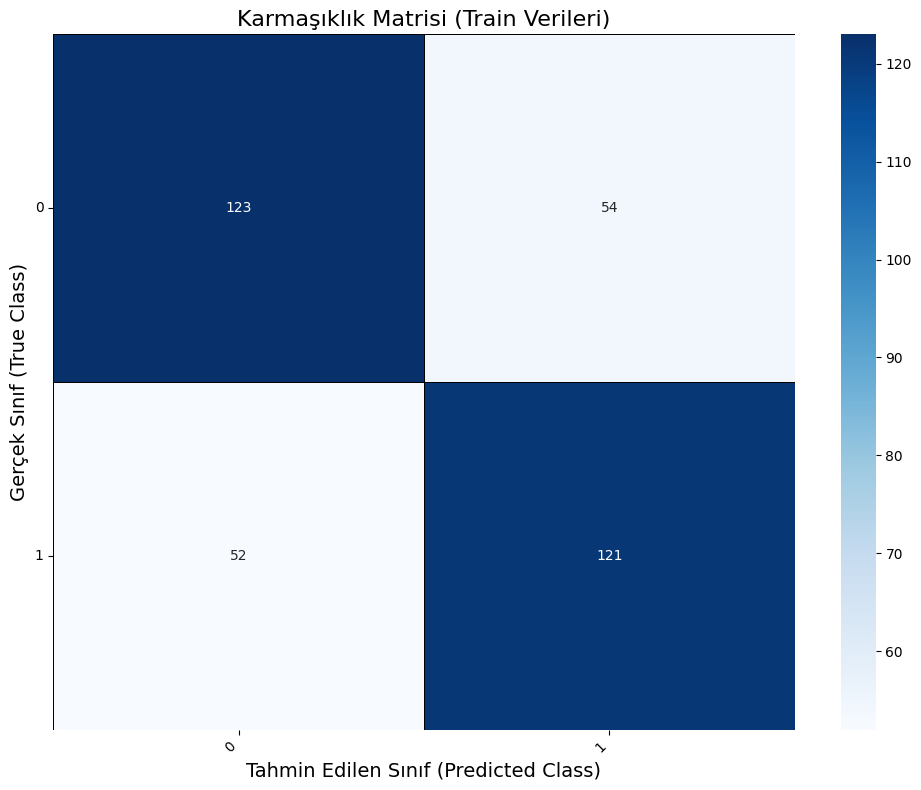

In [76]:
cm = confusion_matrix(y_train, y_pred_train)
cm_df = pd.DataFrame(cm, index=y_train.unique(), columns=y_train.unique())

plt.figure(figsize=(10, 8))
sns.heatmap(
    cm_df,
    annot=True,
    fmt='d',
    cmap='Blues',
    cbar=True,
    linewidths=.5,
    linecolor='black'
)

plt.title('Karmaşıklık Matrisi (Train Verileri)', fontsize=16)
plt.ylabel('Gerçek Sınıf (True Class)', fontsize=14)
plt.xlabel('Tahmin Edilen Sınıf (Predicted Class)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

plt.show()

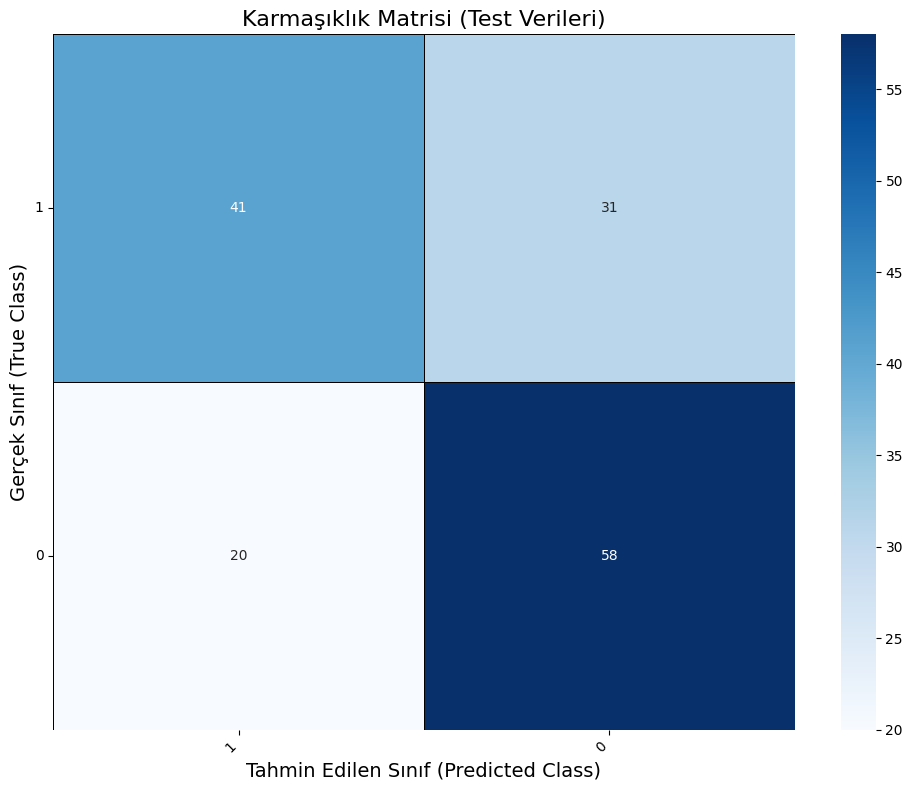

In [77]:
cm = confusion_matrix(y_test, y_pred_test)
cm_df = pd.DataFrame(cm, index=y_test.unique(), columns=y_test.unique())

plt.figure(figsize=(10, 8))
sns.heatmap(
    cm_df,
    annot=True,
    fmt='d',
    cmap='Blues',
    cbar=True,
    linewidths=.5,
    linecolor='black'
)

plt.title('Karmaşıklık Matrisi (Test Verileri)', fontsize=16)
plt.ylabel('Gerçek Sınıf (True Class)', fontsize=14)
plt.xlabel('Tahmin Edilen Sınıf (Predicted Class)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

plt.show()